Question 7

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
import tensorflow as tf

# Load the dataset
file_path = '/content/drive/MyDrive/data science/spotify52kData.csv'  # Replace with your file path
spotify_data = pd.read_csv(file_path)

print(spotify_data)

       songNumber                                     artists  \
0               0                                 Gen Hoshino   
1               1                                Ben Woodward   
2               2                      Ingrid Michaelson;ZAYN   
3               3                                Kina Grannis   
4               4                            Chord Overstreet   
...           ...                                         ...   
51995       51995                        Don Omar;Trebol Clan   
51996       51996                                    Don Omar   
51997       51997                                    Don Omar   
51998       51998  Moneybagg Yo;Pooh Shiesty;Lil Durk;EST Gee   
51999       51999                         Don Omar;Juan Magán   

                                              album_name  \
0                                                 Comedy   
1                                       Ghost (Acoustic)   
2                                      

In [2]:
spotify_data.isna().sum()

songNumber          0
artists             0
album_name          0
track_name          0
popularity          0
duration            0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [3]:
# Assuming df is your DataFrame and 'genre' is the column where you want to make the change
# Replace 'alt' with 'alternative rock' in the 'genre' column
spotify_data['track_genre'] = spotify_data['track_genre'].replace('alternative', 'alt-rock')



# Check for duplicate rows
spotify_data.drop('songNumber', axis=1, inplace=True)
duplicates = spotify_data.duplicated().sum()
nulls=spotify_data.duplicated().isna().sum()


print(f"Number of duplicate rows in the dataset: {duplicates}")
print(f"Number of nulls in the dataset: {nulls}")

spotify_data_dropped=spotify_data.drop_duplicates()
print(spotify_data_dropped.shape)

Number of duplicate rows in the dataset: 863
Number of nulls in the dataset: 0
(51137, 19)


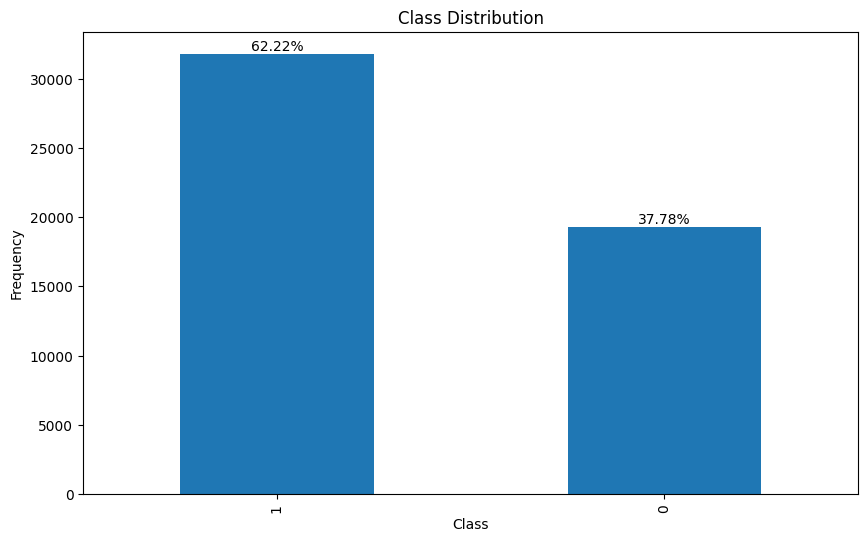

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the occurrences of each class
class_counts = spotify_data_dropped['mode'].value_counts()  # Replace 'class_column' with your column name

# Calculate percentages
total = class_counts.sum()
percentages = (class_counts / total) * 100

# Plotting the class distribution
plt.figure(figsize=(10, 6))
bars = class_counts.plot(kind='bar')

plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Annotate with percentages
for bar in bars.patches:
    class_label = bar.get_x() + bar.get_width() / 2
    yval = bar.get_height()
    percentage = percentages[class_counts.index[int(class_label)]]
    plt.text(class_label, yval, f'{percentage:.2f}%', va='bottom', ha='center')

plt.show()

In [6]:
# Predicting Major or Minor Key from Valence
# Assuming 'key' is binary (1 for Major, 0 for Minor)
X_key = spotify_data_dropped[['valence']]  # Feature
y_key = spotify_data_dropped['mode']        # Target


# Splitting the dataset for key prediction
X_key_train, X_key_test, y_key_train, y_key_test = train_test_split(X_key, y_key, test_size=0.2, random_state=16394389) # Jainam Jain Net ID

# Logistic Regression with Cross-Validation for key prediction
log_reg = LogisticRegression()
# log_reg_scores = cross_val_score(log_reg, X_key_train, y_key_train, cv=5, scoring='roc_auc')
log_reg.fit(X_key_train, y_key_train)

# Make predictions on the test data
y_pred = log_reg.predict_proba(X_key_test)[:, 0]

# Calculate ROC AUC for the test data
roc_auc_test = roc_auc_score(y_key_test, y_pred)
print('ROC AUC for Logistic Regression on Test Data:', roc_auc_test)


# Support Vector Machine with Cross-Validation for key prediction
# Initialize the SVM model with probability=True
svm_model = SVC(kernel="rbf",probability=True)

# Fit the model on the training data
svm_model.fit(X_key_train, y_key_train)

# Predict probabilities on the test data
y_pred_proba = svm_model.predict_proba(X_key_test)[:, 1]

# Calculate ROC AUC on the test data
roc_auc_test = roc_auc_score(y_key_test, y_pred_proba)

print('ROC AUC for SVM on Test Data:', roc_auc_test)

ROC AUC for Logistic Regression on Test Data: 0.49658199666456465
ROC AUC for SVM on Test Data: 0.4956892074374156


In [7]:
# Re-defining the features as per the user's instruction
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness','tempo']
for feature in features:
    X_key = spotify_data_dropped[[feature]]  # Feature
    y_key = spotify_data_dropped['mode']        # Target
    print(feature)

    # Splitting the dataset for key prediction
    X_key_train, X_key_test, y_key_train, y_key_test = train_test_split(X_key, y_key, test_size=0.2, random_state=16394389) # Jainam Jain Net ID

    # Logistic Regression with Cross-Validation for key prediction
    log_reg = LogisticRegression()
    log_reg.fit(X_key_train, y_key_train)

    # Make predictions on the test data
    y_pred = log_reg.predict_proba(X_key_test)[:, 0]

    # Calculate ROC AUC for the test data
    roc_auc_test = roc_auc_score(y_key_test, y_pred)
    print('ROC AUC for Logistic Regression on Test Data:', roc_auc_test)

duration
ROC AUC for Logistic Regression on Test Data: 0.5243516226099658
danceability
ROC AUC for Logistic Regression on Test Data: 0.45529471736724714
energy
ROC AUC for Logistic Regression on Test Data: 0.4494315119304384
loudness
ROC AUC for Logistic Regression on Test Data: 0.46640579439879143
speechiness
ROC AUC for Logistic Regression on Test Data: 0.430518068032085
acousticness
ROC AUC for Logistic Regression on Test Data: 0.4445450541415262
instrumentalness
ROC AUC for Logistic Regression on Test Data: 0.46163840380033516
liveness
ROC AUC for Logistic Regression on Test Data: 0.49618539229807246
tempo
ROC AUC for Logistic Regression on Test Data: 0.4902568154362444
